In [3]:
## dictionary mapping the ligand name in the dataset to the xyz file
ligand_to_xyz = {
    "1,2-Benzenedithiol": "1_2_benzenedithiol.xyz",
    "triphenylphosphine": "triphenylphosphine.xyz",
    "1,2-bis(dicyclohexylphosphino)ethane": None,
    "2-Mercaptonicotinic acid": "2_Mercaptonicotinic_acid.xyz",
    "3-Aminopyridine-2(1H)-thione": "3_Aminopyridine_2_1H_thione.xyz",
    "2-Mercapto-6-methylpyridine": "2_Mercapto_6_methylpyridine.xyz",
    "3-Bromo-6-mercaptopyridine": "3_Bromo_6_mercaptopyridine.xyz",
    "6-Mercaptonicotinonitrile": "6_mercaptonicotinonitrile.xyz",
    "3-Bromopyridine-2(1H)-thione": "3-Bromopyridine-2(1H)-thione.xyz",
    "5-Chloropyridine-2-thiol": "5_Chloropyridine_2_thiol.xyz",
    "8-Mercaptoquinoline Hydrochloride": "8_mercaptoquinoline_hydrochloride.xyz",
    "4,4'-methylene bis(N,N-dimethylaniline)": None,
    "tetramethyldiaminomethane": None,
    "N,N-dimethyl-p-toluidine": None,
    "diphenylamine": "diphenylamine.xyz",
    "benzimidazole": "benzimidazole.xyz",
    "diisobutylamine": "diisobutylamine.xyz",
    "catechol": "catechol.xyz",
    "4 methoxy phenol": "4_methoxyphenol.xyz",
    "4-fluoro-2-nitrophenol": "4_fluoro_2_nitrophenol.xyz",
    "2-amino-4-(trifluoromethyl)benzenethiolhydrochloride": "2_amino_4_trifluoromethylbenzenethiolhydrochloride.xyz",
    "triphenylmethane thiol": "triphenylmethanethiol.xyz",
    "aniline": "aniline.xyz",
    "2 amino benzethiol": "2_aminobenzethiol.xyz",
    "o-phenylene diamine": "o_phenylene_diamine.xyz",
    "2-bromoethylamine hydrobromide": "2_bromoethylamine_hydrobromide.xyz",
    "3 methoxypropylamine": "3_methoxypropylamine.xyz",
    "ethanolamine": "ethanolamine.xyz",
    "pyridine": "pyridine.xyz",
    "2,6 diphenyl pyridine": None,
    "2,6-difluoropyridine": "2_6_difluoropyridine.xyz",
    "piperidine": "piperidine.xyz",
    "4-hydroxy-2,2,6,6-tetramethylpiperidine": "4_hydroxy2_2_6_6_tetramethylpiperidine.xyz",
    "Ethyl piperidine-3-carboxylate": "ethyl_piperidine_3_carboxylate.xyz",
    "2,2′-Bipyridyl": "2_2bipyridyl_structure.xyz",
    "1,10-phenanthroline, anhyd": None,
    "bathophenanthroline": "ni_oct_2_batho-phen_3_s_1_conf_1.xyz",
    "tertbutylcyanoacetate": "ni_oct_2_tertbutyl-cyanoacetate_6_s_1_conf_1.xyz",
    "4-Cyanobenzoyl chloride": "ni_oct_2_4-Cyano-benzoylchloride_6_s_1_conf_1.xyz",
    "7,7,8,8-tetracyanoquinodimethane": "ni_oct_2_7788tetracyanoquinodimethane_3_s_1_conf_1.xyz",
    "acetylacetone": None,
    "1,3,5 benzene tricarboxylic acid": "ni_oct_2_1-3-5-benzenetricarboxylicacid_3_s_1_conf_1.xyz",
    "cyclohexanecarboxylic acid": "ni_oct_2_cyclohexanecarboxylicacid_3_s_1_conf_1.xyz",
    "tricyclohexylphosphine": None,
    "8-quinolinol": "ni_oct_2_8quinolinol_3_s_1_conf_1.xyz",
    "8-mercaptoquinoline hydrochloride": "8_mercaptoquinoline_hydrochloride.xyz",
    "5,7-dichloro-8-hydroxyquinoline": "ni_oct_2_57dichloro8hydroxyquinoline_3_s_1_conf_1.xyz",
    "1133-tetramethylguanidine": "ni_oct_2_1133tetramethylguanidine_6_s_1_conf_1.xyz",
    "1,4-butanedithiol": "ni_thd_2_1-4-butanedithiol_4_s_1_conf_1.xyz",
    "1-octanethiol": "ni_thd_2_1-oct-thiol_4_s_1_conf_1.xyz",
    "4,5 dimethyl 1,2 phenylene diamine": "ni_oct_2_45_dimethyl12phenylenediamine_3_s_1_conf_1.xyz",
    "4,5-dichloro-o-phenylenediamine": "ni_oct_2_45-dichloro-o-phenylenediamine_3_s_1_conf_1.xyz",
    "N,N'-diphenyl-p-phenylenediamine": "ni_thd_2_NNdiphenyl-p-phenylenediamine_4_s_1_conf_1.xyz",
    "3-mercaptopropionic acid": "ni_thd_2_3mercaptopropionicacid_4_s_1_conf_1.xyz",
    "3,3,3 triphenyl propionic acid": None,
    "2-mercaptopyridine": "2mercaptopyridine_structure.xyz",
}

In [4]:
# df_01['Ligand Name'].values

In [ ]:
import os
import torch
import umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read
from mace.calculators import MACECalculator
from tqdm import tqdm


# ============================================================
# 1. Collect XYZ FILES FROM BOTH DIRECTORIES
# ============================================================

xyz_dirs = [
    "/home/jovyan/shared-scratch-kabdelma-pvc/kabdelma/HER-metal-complex-ligands/savs_xyz_files",
    "/home/jovyan/shared-scratch-kabdelma-pvc/kabdelma/HER-metal-complex-ligands/complexes/xyz",
]

xyz_files = []

for path in xyz_dirs:
    for fname in os.listdir(path):
        if fname.endswith(".xyz") and "hydride" not in fname.lower() and "badjob" not in fname.lower():
            xyz_files.append(os.path.join(path, fname))

print(f"Total usable XYZ files: {len(xyz_files)}")


# ============================================================
# 2. LOAD MACE MODEL (GPU) + EXTRACT EMBEDDINGS
# ============================================================

calc = MACECalculator(
    model_path='MACE-omol-0-extra-large-1024.model',
    device='cuda'
)

all_embeddings = []
all_filenames = []

for fullpath in tqdm(xyz_files):
    atoms = read(fullpath)

    emb = calc.get_descriptors(atoms)  # (num_atoms, d)
    emb = emb.mean(axis=0)             # molecular descriptor
    emb = np.asarray(emb)

    all_embeddings.append(emb)
    all_filenames.append(os.path.basename(fullpath))


all_embeddings = np.vstack(all_embeddings)   # (N, D)
print(f"Final embedding matrix: {all_embeddings.shape}")

cuequivariance or cuequivariance_torch is not available. Cuequivariance acceleration will be disabled.


Total usable XYZ files: 69


/opt/conda/lib/python3.11/site-packages/torch/overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torch.has_cuda,
/opt/conda/lib/python3.11/site-packages/torch/overrides.py:111: UserWarning: 'has_cudnn' is deprecated, please use 'torch.backends.cudnn.is_available()'
  torch.has_cudnn,
/opt/conda/lib/python3.11/site-packages/torch/overrides.py:117: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  torch.has_mps,
/opt/conda/lib/python3.11/site-packages/torch/overrides.py:118: UserWarning: 'has_mkldnn' is deprecated, please use 'torch.backends.mkldnn.is_available()'
  torch.has_mkldnn,


Using head omol out of ['omol']
No dtype selected, switching to float64 to match model dtype.


100%|██████████| 69/69 [00:28<00:00,  2.42it/s]
/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Final embedding matrix: (69, 3072)
UMAP shape: (69, 2)
Ligands with H₂ values at 0.1 mM: 56


Total XYZ with H₂ values: 46
Embeddings kept: 41
Dropped: 28
UMAP shape: (41, 2)


/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


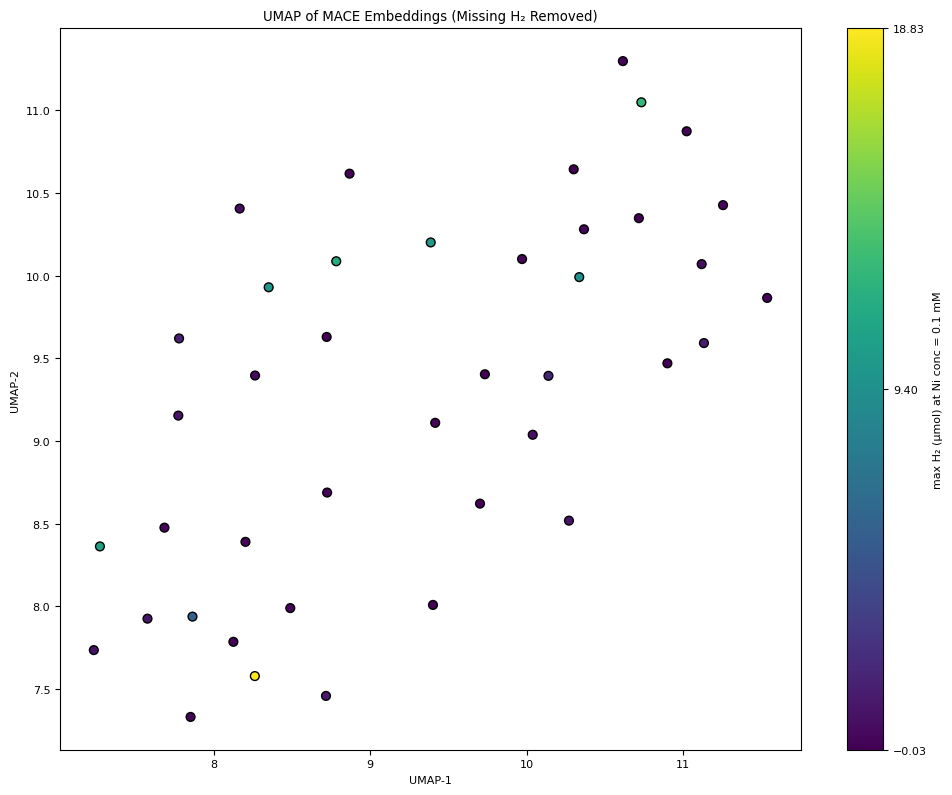

In [8]:
# ============================================================
# 0. LOAD H₂ VALUES AND XYZ MAPPING
# ============================================================

df = pd.read_excel("dataset.xlsx")
df_01 = df[df["Ni conc [mM]"] == 0.1]

# Ligand → H2 mapping
ligand_to_h2 = (
    df_01.groupby("Ligand Name")["max h2 (umol)"]
    .first()
    .to_dict()
)

# Make sure ligand_to_xyz has no missing filenames
ligand_to_xyz = {k: v for k, v in ligand_to_xyz.items() if v is not None}

# Reverse: xyz → ligand
xyz_to_ligand = {v: k for k, v in ligand_to_xyz.items()}

# xyz → H2
xyz_to_h2 = {
    xyz: ligand_to_h2[ligand]
    for xyz, ligand in xyz_to_ligand.items()
    if ligand in ligand_to_h2
}

print("Total XYZ with H₂ values:", len(xyz_to_h2))


# ============================================================
# 1. FILTER EMBEDDINGS *BEFORE* UMAP
# ============================================================

filtered_embeddings = []
filtered_filenames = []
filtered_h2 = []

for emb, fname in zip(all_embeddings, all_filenames):
    if fname in xyz_to_h2:         # keep only samples with H2
        filtered_embeddings.append(emb)
        filtered_filenames.append(fname)
        filtered_h2.append(xyz_to_h2[fname])

filtered_embeddings = np.array(filtered_embeddings)
filtered_h2 = np.array(filtered_h2)

print("Embeddings kept:", filtered_embeddings.shape[0])
print("Dropped:", len(all_embeddings) - len(filtered_embeddings))


# ============================================================
# 2. UMAP DIMENSIONALITY REDUCTION
# ============================================================

reducer = umap.UMAP(n_components=2, random_state=0)
umap_embeddings = reducer.fit_transform(filtered_embeddings)

print("UMAP shape:", umap_embeddings.shape)


# ============================================================
# 3. PLOT
# ============================================================

plt.figure(figsize=(10, 8))
sc = plt.scatter(
    umap_embeddings[:, 0],
    umap_embeddings[:, 1],
    c=filtered_h2,
    cmap="viridis",
    s=40,
    edgecolors="k"
)

cb = plt.colorbar(sc)
cb.set_label("max H₂ (µmol) at Ni conc = 0.1 mM")

# 3 ticks: min, mid, max
h2_min = np.min(filtered_h2)
h2_max = np.max(filtered_h2)
h2_mid = 0.5 * (h2_min + h2_max)
cb.set_ticks([h2_min, h2_mid, h2_max])

plt.title("UMAP of MACE Embeddings (Missing H₂ Removed)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()


## TSNE dimentionality Reduction

Kept embeddings: 41
Removed missing: 28


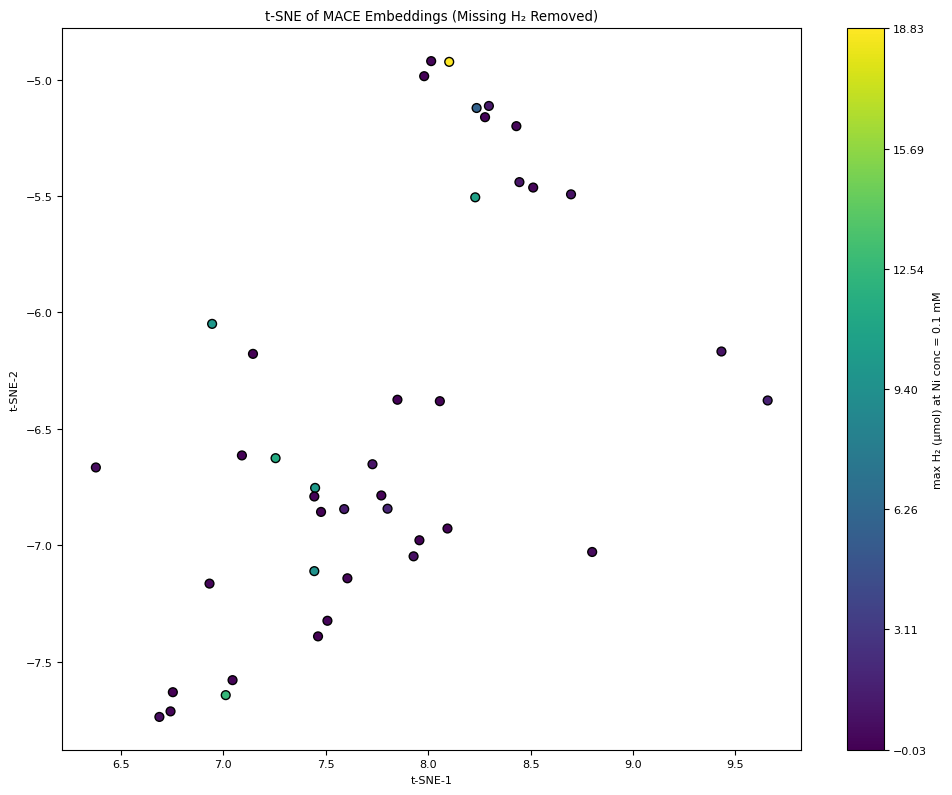

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# ============================================
# 1. Build xyz → H2 lookup (already done earlier)
# ============================================

# xyz_to_h2  ← you already created this above:
# xyz_to_h2 = {xyz_name: h2_value, ...}

# ============================================
# 2. FILTER BEFORE TSNE
# ============================================

filtered_features = []
filtered_filenames = []
filtered_h2 = []

exclude_max = False  # set True if you want to drop max-H2 outlier

# Compute max H2 if excluding
if exclude_max:
    all_h2_vals = [xyz_to_h2.get(f, np.nan) for f in all_filenames]
    max_h2 = np.nanmax(all_h2_vals)

missing_count = 0

for feats, fname in zip(all_embeddings, all_filenames):
    if fname not in xyz_to_h2:   # skip missing H2
        missing_count += 1
        continue
    
    h2_val = xyz_to_h2[fname]
    
    # Optionally remove maximum H₂ outlier
    if exclude_max and h2_val == max_h2:
        continue

    filtered_features.append(feats)
    filtered_filenames.append(fname)
    filtered_h2.append(h2_val)

filtered_features = np.array(filtered_features)
filtered_h2 = np.array(filtered_h2)

print("Kept embeddings:", filtered_features.shape[0])
print("Removed missing:", missing_count)


# ============================================
# 3. t-SNE DIMENSIONALITY REDUCTION
# ============================================

tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    max_iter=1000   # using sklearn >= 1.4 syntax
)

tsne_embeddings = tsne.fit_transform(filtered_features)


# ============================================
# 4. SCATTER PLOT
# ============================================

plt.figure(figsize=(10, 8))
sc = plt.scatter(
    tsne_embeddings[:, 0],
    tsne_embeddings[:, 1],
    c=filtered_h2,
    cmap="viridis",
    s=40,
    edgecolors="k"
)

cb = plt.colorbar(sc)
cb.set_label("max H₂ (µmol) at Ni conc = 0.1 mM")

# e.g. 7 ticks for smoother gradient
cb.set_ticks(np.linspace(np.min(filtered_h2), np.max(filtered_h2), 7))

plt.title("t-SNE of MACE Embeddings (Missing H₂ Removed)")
plt.xlabel("t-SNE-1")
plt.ylabel("t-SNE-2")
plt.tight_layout()
plt.show()
